## Classical and quantum simulations on the Nitrogen molecule


In the strongly correlated regime, the classical algorithm CCSD breaks down. It is interesting how its quantum counterpart q-UCCSD performs, and in the paper by Sokolov et. al. [[1]](#rsc) it is found that the quantum algorithm implemented on a quantum computer simulator performs better, and reproduces the qualitative behavior of the energy as a function of the bond length of $N_2$. However, the deviation from the exact results are still not within chemical accuracy, at least not the results from the simulations run on a computer with only 8 GB RAM.

An important factor for the computational cost is how many orbitals that are used in the simulations. Currently, we have a good understanding of the frozen core approximation, and which orbitals to remove. It is possible to further taper off qubits, as done in the paper by Sokolov et. al., but this is currently only partially implemented. 

The simulations presented here are computationally demanding. It is expected that reruns on computers with more RAM (more than 8 GB), will be produce better results.

The classical results here are calculated using the psi4 library, via the openfermion library. Experimenting with other, hopefully slightly more user friendly, libraries should also be done in the future. 

In [5]:
from quantum_chem_VQE_N2 import *
from qiskit import BasicAer
import numpy as np

backend = BasicAer.get_backend("statevector_simulator")
driver = "PYSCF"

    
newparams = {'figure.figsize': (10, 7), 'axes.grid': False,
             'lines.markersize': 10, 'lines.linewidth': 2,
             'font.size': 15, 'mathtext.fontset': 'stix',
             'font.family': 'STIXGeneral', 'figure.dpi': 200}
plt.rcParams.update(newparams)

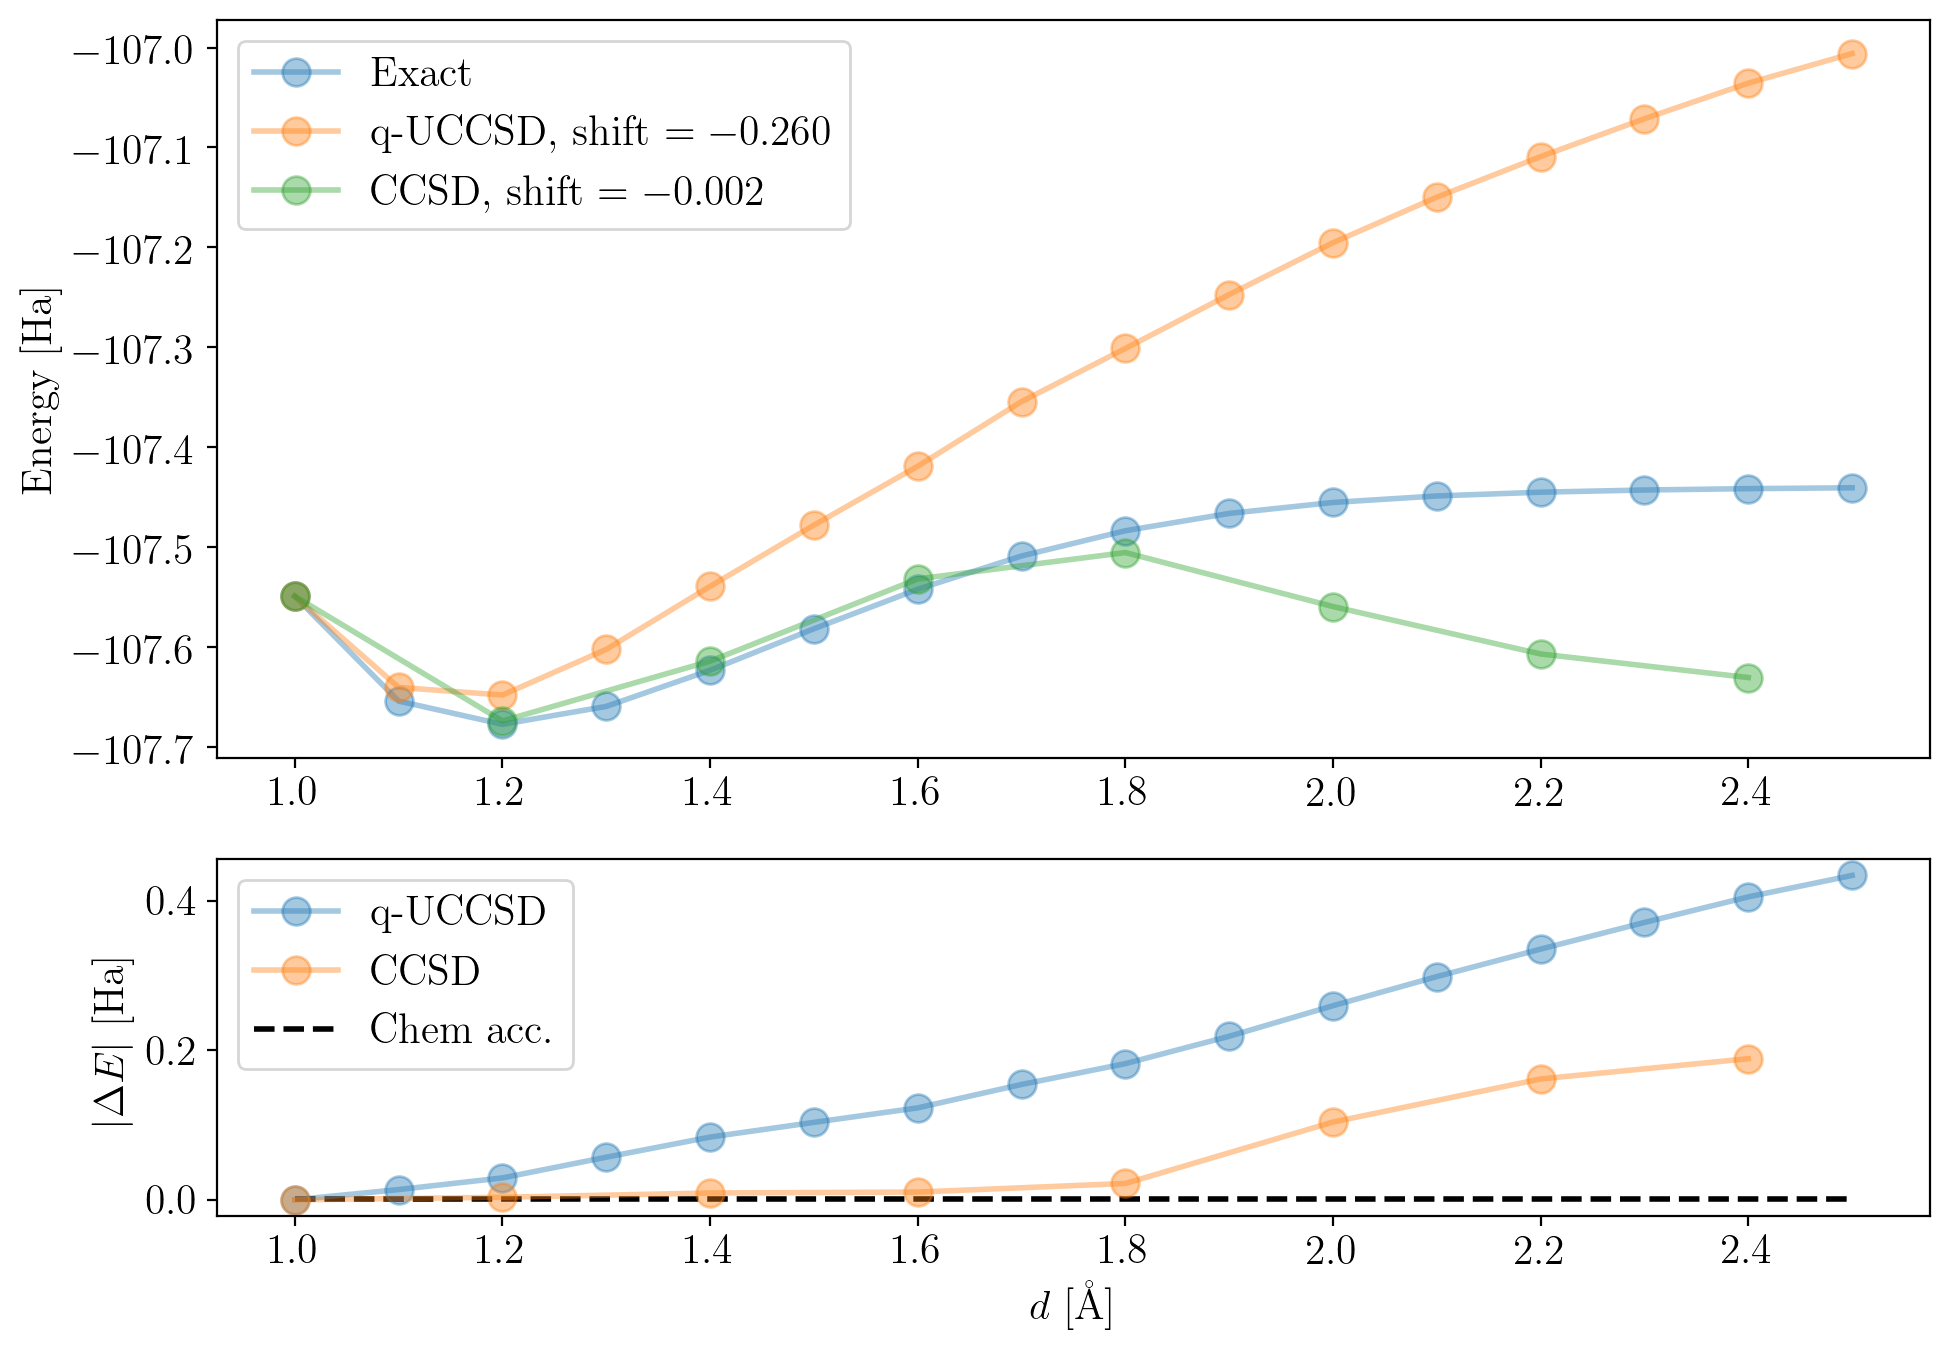

In [8]:
redo_calculations = False
save_calculations = False


if redo_calculations:
    distances_N2 = np.arange(1.0, 2.6, 0.1)
    # Here we do not remove any non-core orbitals
    exact_energies_N2 = get_exact_energies_N2(distances_N2, driver, remove_list=[])
    # Here we remove four of the orbitals with the highest energy
    VQE_energies_N2 = get_VQE_energies_N2(distances_N2, backend, driver, remove_list=[-2,-3])
    distances_ccsd_N2 = np.arange(1.0, 2.6, 0.2)
    try:
        from quantum_chem_psi4_N2 import get_ccsd_energies_N2
        ccsd_energies_N2 = get_ccsd_energies_N2(distances_ccsd_N2, print_info=True)
    except:
        "Could not import the openfermion library"
        distances_ccsd_N2 = np.genfromtxt("data/distances_ccsd_N2.csv", delimiter=",")
        ccsd_energies_N2 = np.genfromtxt("data/distances_ccsd_N2.csv", delimiter=",")
    if save_calculations:
        np.savetxt("data/distances_N2.csv", distances_N2, delimiter=",")
        np.savetxt("data/exact_energies_N2.csv", exact_energies_N2, delimiter=",")
        np.savetxt("data/VQE_energies_N2.csv", VQE_energies_N2, delimiter=",")
        np.savetxt("data/distances_ccsd_N2.csv", distances_ccsd_N2, delimiter=",")
        np.savetxt("data/ccsd_energies_N2.csv", ccsd_energies_N2, delimiter=",")
else:
    distances_N2 = np.genfromtxt("data/distances_N2.csv", delimiter=",")
    exact_energies_N2 = np.genfromtxt("data/exact_energies_N2.csv", delimiter=",")
    VQE_energies_N2 = np.genfromtxt("data/VQE_energies_N2.csv", delimiter=",")
    distances_ccsd_N2 = np.genfromtxt("data/distances_ccsd_N2.csv", delimiter=",")
    ccsd_energies_N2 = np.genfromtxt("data/ccsd_energies_N2.csv", delimiter=",")

plot_accuracy(ccsd_energies_N2[:-1], VQE_energies_N2, exact_energies_N2, distances_N2, distances_ccsd_N2[:-1])

<a id="rsc"></a>
## References
<a>[1]</a>: Igor O. Sokolov et. al., *Quantum Orbital-Optimized Unitary Coupled Cluster Methods in the Strongly Correlated Regime: Can Quantum Algorithms Outperform their Classical Equivalents*, 2019. <br />